In [32]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np
import torch
from torchvision import transforms, utils, models

import os
import re

In [33]:
# set parameters
np.random.seed(0)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
data_dir = "data/cinic10"

batch_size = 64
epochs = 15

steps_per_epoch = 100
steps_per_epoch = min(steps_per_epoch, 90000/batch_size)

In [34]:
# # create generators for the training and test sets

# datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
    
# )
# train_generator = datagen.flow_from_directory(
#     data_dir + "/train",
#     target_size=(32, 32),  # Resize images to this size
#     batch_size=batch_size,  # Number of images to load at each iteration
#     class_mode="categorical",
# )  # Type of classification ('binary' or 'categorical')

# test_generator = datagen.flow_from_directory(
#     data_dir + "/test",
#     target_size=(32, 32),
#     batch_size=batch_size,
#     class_mode="categorical",
# )

In [45]:
device = torch.device('mps')

model =  models.resnet18(pretrained=True).to(device)


In [46]:
data_dir = "data/cinic10/"

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomHorizontalFlip(),
                                transforms.Resize((280,280)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])
test_transforms = transforms.Compose([
                                transforms.Resize((280,280)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])

train_data = datasets.ImageFolder(data_dir + 'train', transform=train_transforms, )
test_data = datasets.ImageFolder(data_dir + 'test', transform=test_transforms)

In [47]:
for image,label in train_data:
    print(image.shape)
    break
    

torch.Size([3, 280, 280])


In [48]:
# def image_convert(img):
#     img = img.clone().cpu().numpy()
#     img = img.transpose(1,2,0)
#     std = [0.5,0.5,0.5]
#     mean = [0.5,0.5,0.5]
#     img = img*std + mean
#     return img


# def plot_10(trainloader):
#         iter_ = iter(trainloader)
#         images,labels = next(iter_)
#         an_ = {'0':'cat','1':'dog'}
        
#         plt.figure(figsize=(20,10))
#         for idx in range(10):
#             plt.subplot(2,5,idx+1)
#             img = image_convert(images[idx])
#             label = labels[idx]
#             plt.imshow(img)
#             plt.title(an_[str(label.numpy())])
#         plt.show()
# plot_10(trainloader)

In [49]:
trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64,shuffle=True)

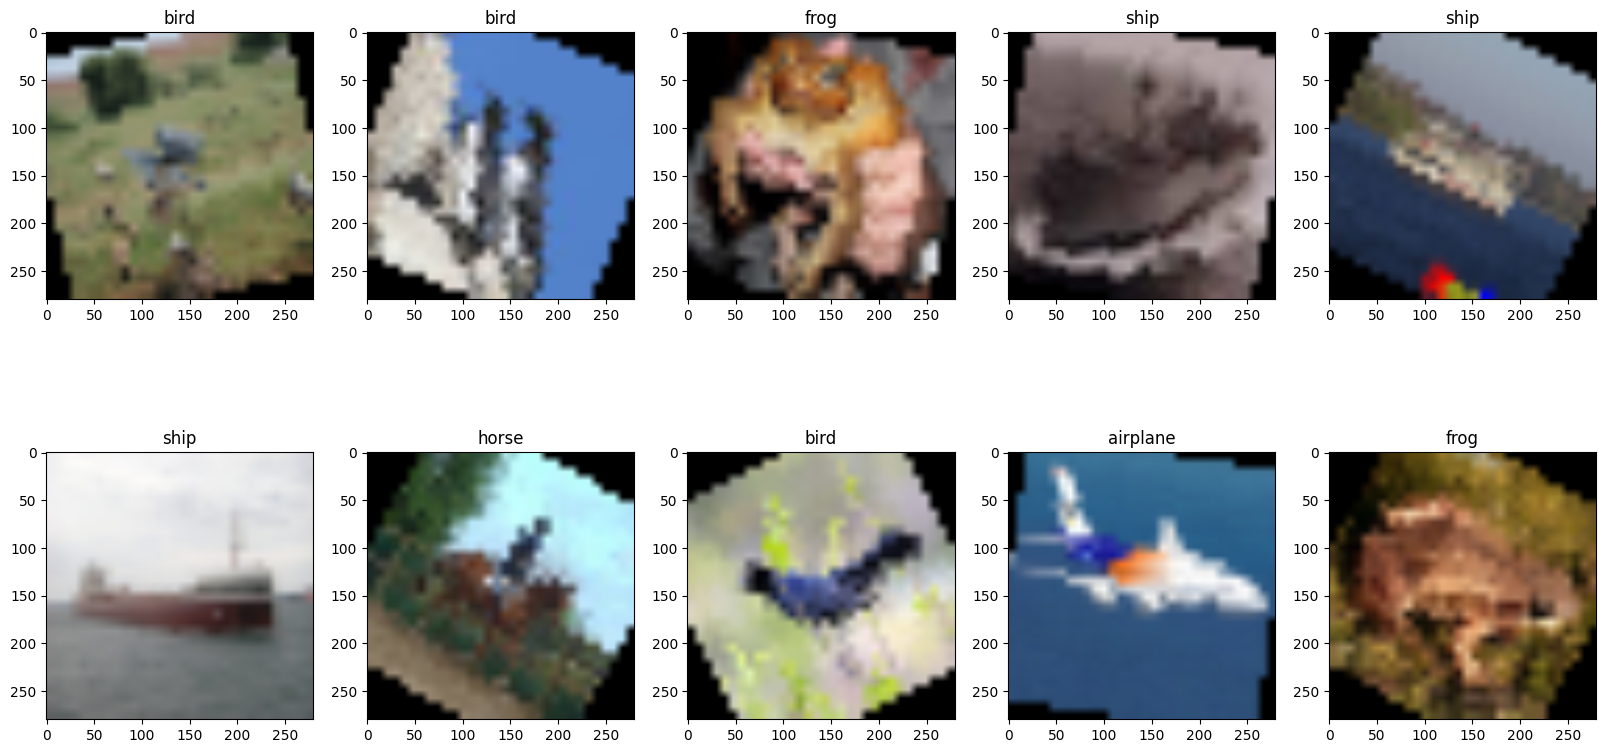

In [50]:
def image_convert(img):
    img = img.clone().cpu().numpy()
    img = img.transpose(1,2,0)
    std = [0.5,0.5,0.5]
    mean = [0.5,0.5,0.5]
    img = img*std + mean
    return img

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_10(trainloader):
        iter_ = iter(trainloader)
        images,labels = next(iter_)
        
        plt.figure(figsize=(20,10))
        for idx in range(10):
            plt.subplot(2,5,idx+1)
            img = image_convert(images[idx])
            label = labels[idx]
            img_int = int(label.numpy())
            plt.imshow(img)
            plt.title(classes[img_int])
        plt.show()
plot_10(trainloader)

In [51]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [53]:
train_loss = []
val_loss = []

epochs = 15

for epoch in range(epochs):
      print("epoch {}/{}".format(epoch+1,epochs))
      running_loss = 0.0
      running_score = 0.0
#       model.train()
      a = len(trainloader.dataset)
      i = 0
      for image,label in trainloader:
          image = image.to(device)
          label = label.to(device)
          optimizer.zero_grad()
          y_pred = model.forward(image)
          loss = criterion(y_pred,label)         
          loss.backward() #calculate derivatives 
          optimizer.step() # update parameters
          val, index_ = torch.max(y_pred,axis=1)
          running_score += torch.sum(index_ == label.data).item()
          running_loss += loss.item()
          i +=1

      
      epoch_score = running_score/len(trainloader.dataset)
      epoch_loss = running_loss/len(trainloader.dataset)
      train_loss.append(epoch_loss)
      print("Training loss: {}, accuracy: {}".format(epoch_loss,epoch_score))
      
      with torch.no_grad():
          model.eval()
          running_loss = 0.0
          running_score = 0.0
          j = 0
          for image,label in testloader:
                image = image.to(device)
                label = label.to(device)
                optimizer.zero_grad()
                y_pred = model.forward(image)
                loss = criterion(y_pred,label)
                running_loss += loss.item()

                val, index_ = torch.max(y_pred,axis=1)
                running_score += torch.sum(index_ == label.data).item()
                j+=1

          
          epoch_score = running_score/len(testloader.dataset)
          epoch_loss = running_loss/len(testloader.dataset)
          val_loss.append(epoch_loss)
          print("Validation loss: {}, accuracy: {}".format(epoch_loss,epoch_score))


epoch 1/15
Training loss: 4.043988099098206, accuracy: 83.79


KeyboardInterrupt: 